In [1]:
from ucimlrepo import fetch_ucirepo
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
X = np.genfromtxt("../data_processed/credit_score/percentiles/X.csv",
                   delimiter=",",
                   dtype=None,
                   encoding="utf-8",
                   names=None)
l = len(X[0])
xx = np.zeros([X.shape[0], l])
for i in range(X.shape[0]):
    for j in range(l):
        xx[i,j] = X[i][j]
X = xx
y = np.loadtxt("../data_processed/credit_score/percentiles/y.csv", dtype=float, delimiter=",")


[1.59118395e-14 5.77262348e-12 8.04759039e-11] 2.0
[3.65317114e-14 1.17039022e-12 7.91180976e-14] 1.0
[9.96473284e-17 2.07568355e-13 1.71740845e-13] 1.0
[1.03164129e-11 2.37671800e-12 4.41911976e-17] 1.0
[5.20541629e-13 2.45611505e-11 1.29501043e-11] 1.0
[1.05488700e-12 1.88242913e-10 7.06152625e-11] 1.0
[9.19677655e-12 8.21953768e-11 3.23302224e-13] 0.0
[2.26072384e-14 1.00152138e-12 5.15683801e-14] 1.0
[1.84792076e-18 1.45790317e-14 4.90201586e-14] 1.0
[3.71108291e-12 1.80663912e-11 1.08511173e-13] 1.0
[2.97933495e-13 8.70509657e-15 2.37295333e-20] 1.0
[4.13843267e-12 3.26978302e-10 3.07681250e-11] 0.0
[2.73609031e-12 8.65339799e-14 5.34597877e-19] 0.0
[1.21252413e-13 6.89407534e-12 1.94876678e-12] 1.0
[1.10511992e-12 4.21544095e-14 1.00353346e-18] 0.0
[5.63823122e-16 5.68189979e-13 7.00684826e-12] 1.0
[4.00147647e-13 1.35458371e-11 1.32493326e-11] 2.0
[1.31523622e-17 8.73018778e-14 9.17316309e-12] 2.0
[2.56996860e-13 3.61149391e-11 1.79897238e-10] 2.0
[7.64203581e-11 4.41881744e-13 

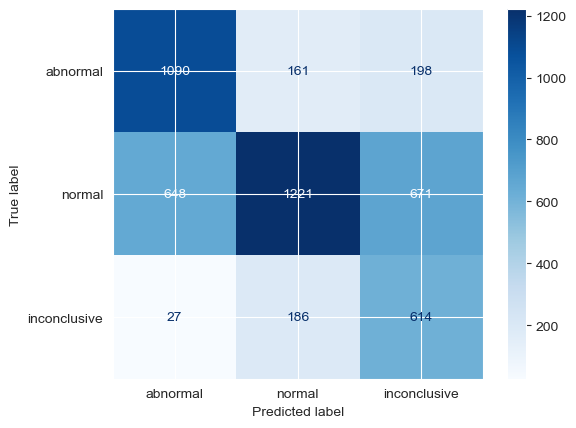

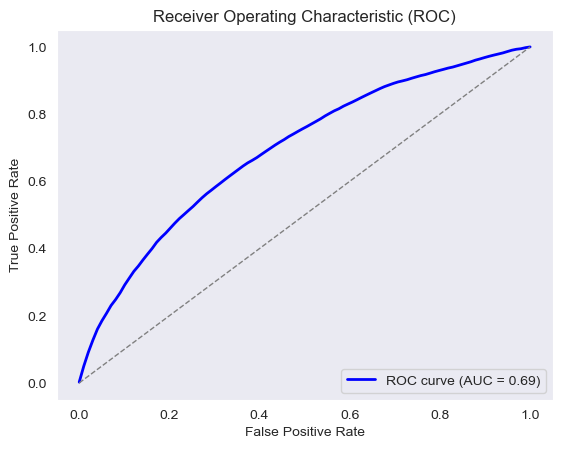

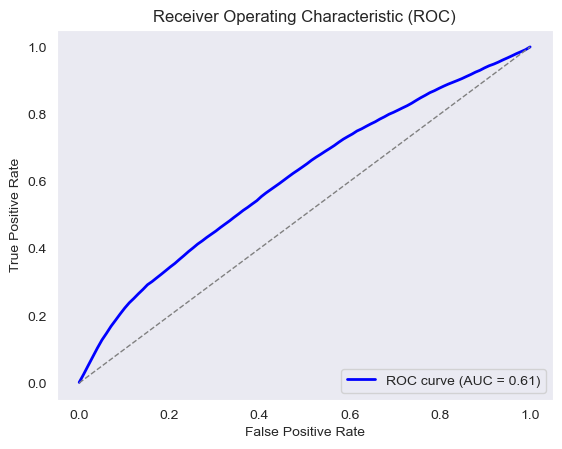

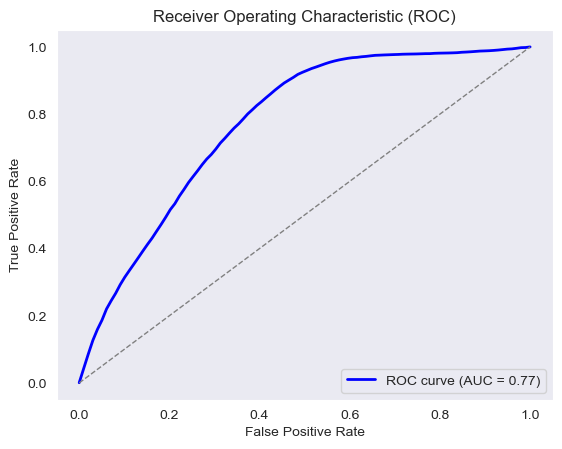

In [5]:
#################### BAYES
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    bay = bayes.NaiveBayes()
    bay.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = bay.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[0.93137255 0.06862745 0.        ] 1.0
[0.55401235 0.42746914 0.01851852] 0.0
[0.55401235 0.42746914 0.01851852] 0.0
[0.         0.56818182 0.43181818] 2.0
[0.01231527 0.94581281 0.04187192] 1.0
[0.1875 0.8125 0.    ] 1.0
[0.10043197 0.4287257  0.47084233] 0.0
[0.         0.96428571 0.03571429] 1.0
[0.06006494 0.73051948 0.20941558] 1.0
[0.22857143 0.7244898  0.04693878] 1.0
[1. 0. 0.] 0.0
[0.59927798 0.38267148 0.01805054] 0.0
[0.06006494 0.73051948 0.20941558] 1.0
[1. 0. 0.] 0.0
[0.07487923 0.54589372 0.37922705] 2.0
[0. 1. 0.] 1.0
[0.6984127 0.3015873 0.       ] 0.0
[0.42424242 0.29545455 0.28030303] 0.0
[0.17142857 0.30612245 0.52244898] 2.0
[0.28776978 0.71223022 0.        ] 1.0
[0.77896787 0.22103213 0.        ] 0.0
[0.07409326 0.36580311 0.56010363] 1.0
[0.4486755  0.51655629 0.03476821] 0.0
[0.         0.58208955 0.41791045] 2.0
[0.66055046 0.33944954 0.        ] 2.0
[0.57754011 0.4171123  0.00534759] 1.0
[0.75675676 0.24324324 0.        ] 0.0
[0.02684564 0.88926174 0.08389262]

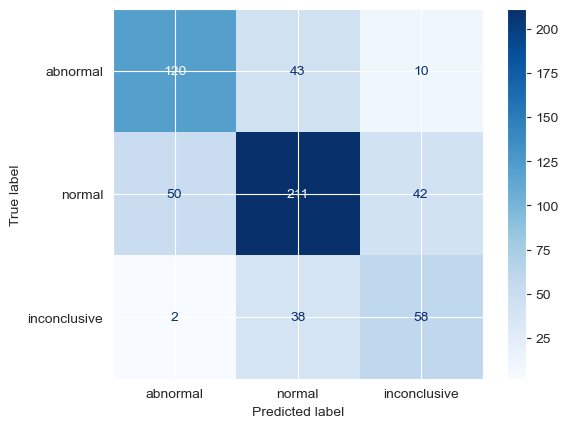

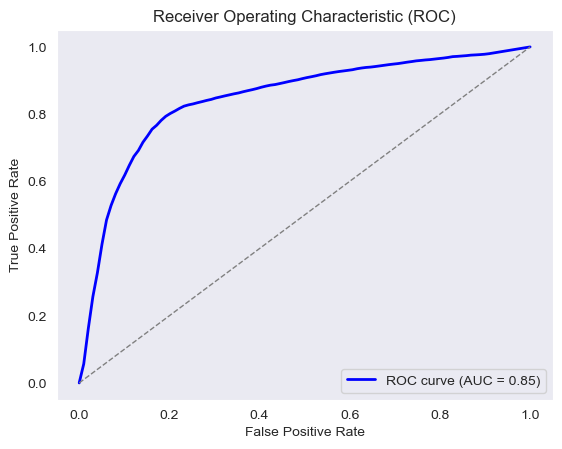

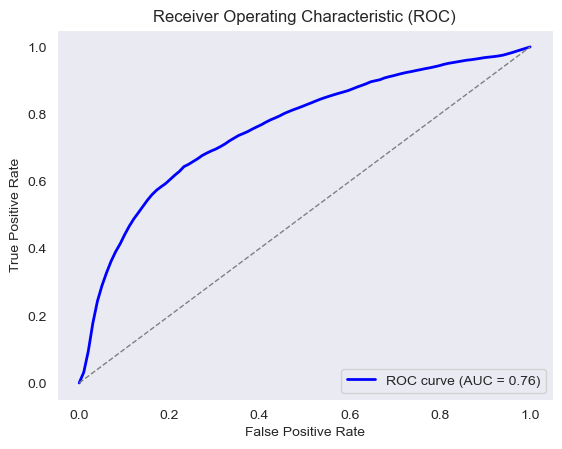

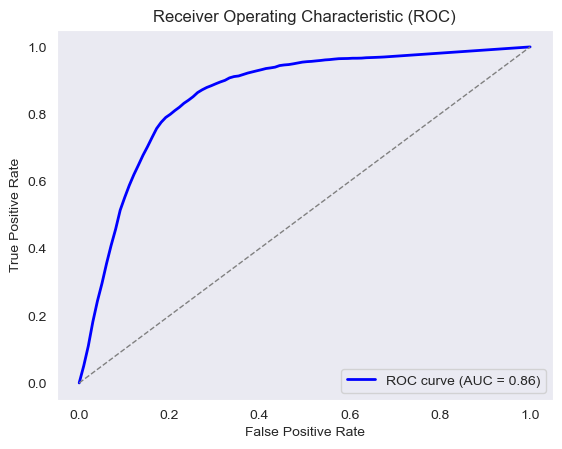

In [6]:
#################### ID3
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    tree = id3.DecisionTreeClassifier(10)
    tree.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = tree.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[0.18 0.4  0.42] 2.0
[0.72 0.26 0.02] 0.0
[0.24 0.72 0.04] 1.0
[0.06 0.84 0.1 ] 1.0
[0.14 0.82 0.04] 1.0
[0.24 0.56 0.2 ] 1.0
[0.16 0.76 0.08] 1.0
[0.86 0.14 0.  ] 0.0
[0.14 0.82 0.04] 1.0
[0.14 0.84 0.02] 1.0
[0.06 0.62 0.32] 1.0
[0.02 0.92 0.06] 1.0
[0.8 0.2 0. ] 0.0
[0.82 0.18 0.  ] 0.0
[0.68 0.28 0.04] 0.0
[0.04 0.22 0.74] 2.0
[0.02 0.2  0.78] 2.0
[0.08 0.82 0.1 ] 1.0
[0.78 0.22 0.  ] 0.0
[0.14 0.84 0.02] 1.0
[0.02 0.52 0.46] 1.0
[0.12 0.8  0.08] 1.0
[0.02 0.94 0.04] 1.0
[0.   0.94 0.06] 1.0
[0.5 0.5 0. ] 0.0
[0.16 0.8  0.04] 1.0
[0.64 0.36 0.  ] 0.0
[0.78 0.22 0.  ] 0.0
[0.88 0.08 0.04] 0.0
[0.02 0.88 0.1 ] 1.0
[0.86 0.14 0.  ] 0.0
[0.18 0.6  0.22] 0.0
[0.06 0.28 0.66] 2.0
[0.88 0.12 0.  ] 0.0
[0.44 0.54 0.02] 0.0
[0.78 0.22 0.  ] 0.0
[0.04 0.88 0.08] 1.0
[0.48 0.42 0.1 ] 0.0
[0.04 0.92 0.04] 1.0
[0.08 0.36 0.56] 2.0
[0.08 0.52 0.4 ] 2.0
[0.92 0.08 0.  ] 0.0
[0.28 0.54 0.18] 0.0
[0.04 0.96 0.  ] 1.0
[0.04 0.44 0.52] 1.0
[0.06 0.82 0.12] 1.0
[0.06 0.74 0.2 ] 1.0
[0.04 0.72 0.24] 0.

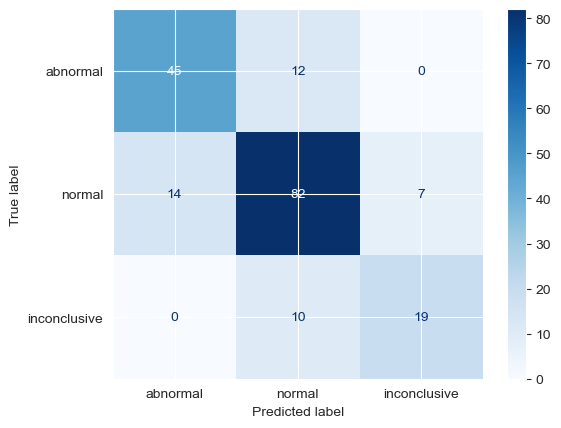

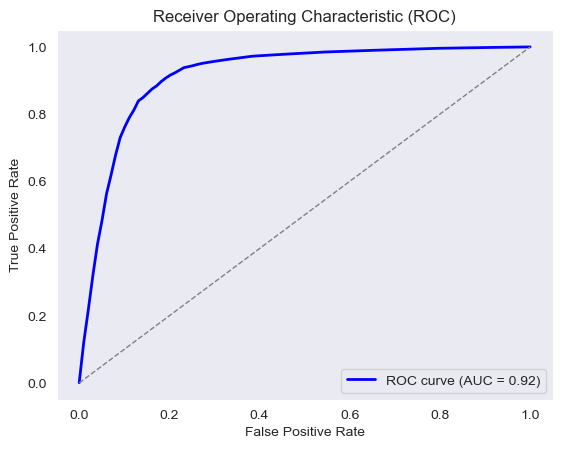

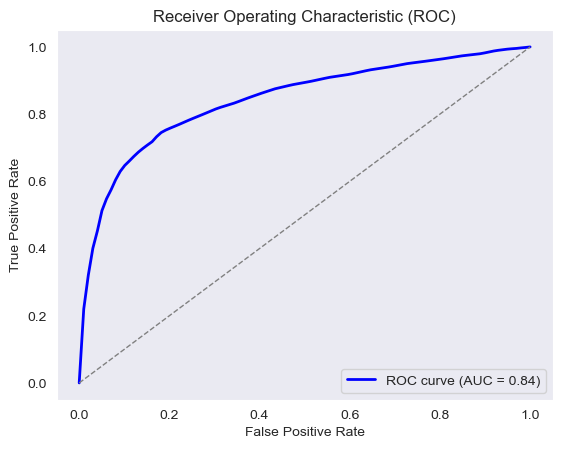

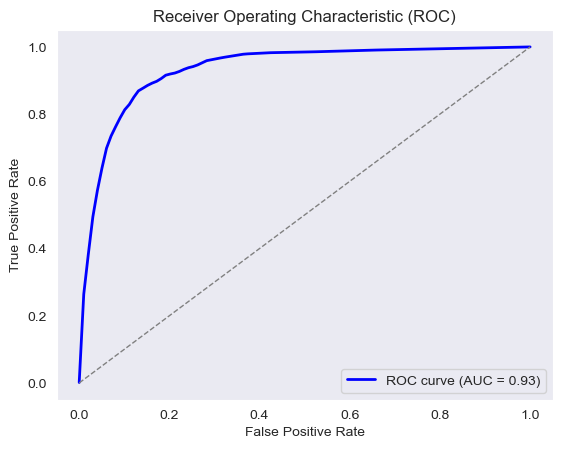

In [7]:
#################### RANDOM FOREST ID3 100%
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=1.0)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
#################### RANDOM FOREST ID3/BAYES 50/50
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list0 = []
tpr_list0 = []
auc_list0 = []
fpr_list1 = []
tpr_list1 = []
auc_list1 = []
fpr_list2 = []
tpr_list2 = []
auc_list2 = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=0.5)

    samples = len(y_test)
    correctly_predicted = 0
    scores0 = [] #####################
    scores1 = [] #####################
    scores2 = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores0.append(prediction[0]) #############333
        scores1.append(prediction[1])
        scores2.append(prediction[2])
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1
    y_test0 = []
    y_test1 = []
    y_test2 = []
    for yyy in y_test:
        if yyy == 0:
            y_test0.append(1)
            y_test1.append(0)
            y_test2.append(0)
        if yyy == 1:
            y_test0.append(0)
            y_test1.append(1)
            y_test2.append(0)
        if yyy == 2:
            y_test0.append(0)
            y_test1.append(0)
            y_test2.append(1)

    fpr0, tpr0, _ = roc_curve(y_test0, scores0)
    roc_auc0 = auc(fpr0, tpr0)
    fpr_list0.append(fpr0)
    tpr_list0.append(tpr0)
    auc_list0.append(roc_auc0)

    fpr1, tpr1, _ = roc_curve(y_test1, scores1)
    roc_auc1 = auc(fpr1, tpr1)
    fpr_list1.append(fpr1)
    tpr_list1.append(tpr1)
    auc_list1.append(roc_auc1)

    fpr2, tpr2, _ = roc_curve(y_test2, scores2)
    roc_auc2 = auc(fpr2, tpr2)
    fpr_list2.append(fpr2)
    tpr_list2.append(tpr2)
    auc_list2.append(roc_auc2)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

cm = confusion_matrix(y_testing, y_pred, labels=[0, 1, 2])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["abnormal", "normal", "inconclusive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr0 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp0 = [np.interp(mean_fpr0, fpr0, tpr0) for fpr0, tpr0 in zip(fpr_list0, tpr_list0)]
# Average the interpolated TPR values
mean_tpr0 = np.mean(tpr_interp0, axis=0)
# Compute the mean AUC
mean_auc0 = np.mean(auc_list0)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr0, mean_tpr0, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Define a common set of FPR values
mean_fpr1 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp1 = [np.interp(mean_fpr1, fpr1, tpr1) for fpr1, tpr1 in zip(fpr_list1, tpr_list1)]
# Average the interpolated TPR values
mean_tpr1 = np.mean(tpr_interp1, axis=0)
# Compute the mean AUC
mean_auc1 = np.mean(auc_list1)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr1, mean_tpr1, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()




# Define a common set of FPR values
mean_fpr2 = np.linspace(0, 1, 100)
# Interpolate TPR values
tpr_interp2 = [np.interp(mean_fpr2, fpr2, tpr2) for fpr2, tpr2 in zip(fpr_list2, tpr_list2)]
# Average the interpolated TPR values
mean_tpr2 = np.mean(tpr_interp2, axis=0)
# Compute the mean AUC
mean_auc2 = np.mean(auc_list2)
# Plot ROC curve
plt.figure()
plt.plot(mean_fpr2, mean_tpr2, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()